In [4556]:
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min

In [4557]:
f_matrix = np.load("FeatureMatrix.npy")
lmbd =6


In [4558]:
f_matrix.shape

(4955, 216)

In [4559]:
isZero = np.all(f_matrix == 0, axis=1)
#axis 1 rows
#deleteFullZero = f_matrix[~numpy.all(a== 0, axis=1)] 

In [4560]:
x_matrix = np.load("X_input.npy")
y_vector = np.load("Y_input.npy")

In [4561]:
x_matrix.shape

(4955, 216)

In [4562]:
zeros = np.where(~x_matrix.any(axis=0))[0]

In [4563]:
zeros


array([  9,  21,  22,  23,  24,  25,  26,  27,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  42,  44,  45,  46,  47,  48,  51,  53,
        54,  55,  56,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  82,  83,
        84,  87,  88,  89,  90,  91,  92,  94,  95,  97,  98,  99, 100,
       101, 103, 104, 105, 106, 108, 110, 111, 113, 114, 116, 117, 118,
       119, 120, 121, 122, 124, 126, 127, 129, 130, 132, 134, 135, 136,
       137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 163, 164, 165, 168,
       169, 170, 171, 172, 173, 175, 176, 178, 179, 180, 181, 182, 184,
       185, 186, 187, 189, 191, 192, 194, 195, 197, 198, 199, 200, 201,
       202, 203, 205, 207, 208, 210, 211, 213, 215])

In [4564]:
t = np.delete(x_matrix,zeros,axis=1)

In [4565]:
t.shape

(4955, 64)

In [4566]:
scaler = StandardScaler()

In [4567]:
arr = scaler.fit_transform(t)


In [4568]:
y = [i for i in range(4955)]
y[-1]

4954

In [4569]:
arr_train, arr_test, y_train, y_test = train_test_split(arr,y, test_size=0.2, random_state = 42 )
#42 used in macOS

Algo1 : K-Means Clustering (n = 3,5,8 clusters will be tested)

In [4570]:
arr_train_alg1 = np.copy(arr_train)
arr_test_alg1 = np.copy(arr_test)

In [4571]:
#fit predict train 
#predict test

In [4572]:
kmeans = KMeans(n_clusters=9, random_state=15).fit(arr_train_alg1)

In [4573]:
tr_p1 = kmeans.predict(arr_train_alg1)

In [4574]:
tes_p1 = kmeans.predict(arr_test_alg1)

In [4575]:

df_alg1 = pd.DataFrame({"x_ind":[0]*4955, "cluster":[0]*4955,"centroid":[0]*4955, "train/test":[0]*4955, "lambda":[0]*4955, "rf":[0]*4955, "error":[0.0]*4955, "parent_ind":[int(-1)]*4955})
df_alg1["rf"] = y_vector

In [4576]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_,arr_train_alg1 )
c_y = []
for i in closest:
    c_y.append(y_vector[y_train[i]])
c_y

[0.4666666666666667,
 0.13333333333333333,
 0.13333333333333333,
 0.0,
 0.13333333333333333,
 0.4666666666666667,
 0.13333333333333333,
 0.06666666666666667,
 0.26666666666666666]

In [4577]:
for i,j in enumerate(tr_p1):
    
    df_alg1.loc[y_train[i], "x_ind"] = y_train[i]
    df_alg1.loc[y_train[i], "cluster"] = j
    if(i in closest):
        df_alg1.loc[y_train[i], "centroid"] = 1
    else:
        df_alg1.loc[y_train[i], "parent_ind"] = y_train[closest[j]]
        df_alg1.loc[y_train[i], "lambda"] += 1
    
    
    
    df_alg1.loc[y_train[i], "error"] =   c_y[j] - y_vector[y_train[i]]


for i, j in enumerate(tes_p1):
    df_alg1.loc[y_test[i], "x_ind"] = y_test[i]
    df_alg1.loc[y_test[i], "cluster"] = j
    df_alg1.loc[y_test[i], "train/test"] = 1
    df_alg1.loc[y_test[i], "lambda"] += 1
    df_alg1.loc[y_test[i], "error"]= c_y[j] - y_vector[y_test[i]]
    df_alg1.loc[y_test[i], "parent_ind"] = y_train[closest[j]]

    
    

    
df_alg1

,x_ind,cluster,centroid,train/test,lambda,rf,error,parent_ind
0,0,2,0,0,1,0.000000,0.133333,421
1,1,2,0,0,1,0.000000,0.133333,421
2,2,2,0,0,1,0.000000,0.133333,421
3,3,4,0,0,1,0.000000,0.133333,542
4,4,2,0,0,1,0.000000,0.133333,421
...,...,...,...,...,...,...,...,...
4950,4950,1,0,0,1,1.000000,-0.866667,4511
4951,4951,1,0,1,1,0.600000,-0.466667,4511
4952,4952,3,0,0,1,0.333333,-0.333333,456
4953,4953,1,0,1,1,0.333333,-0.200000,4511


In [4578]:
df_alg1.to_csv("data1_alg1_itf.csv")

In [4579]:
# df_it1 = df_alg1.loc[df_alg1['cluster']== 0]
# df_it1.shape
# df_it1 = df_it1.loc[df_alg1['parent_ind']>=0]
# test_x= df_it1.loc[df_it1['train/test']==1]
# train_x = df_it1.loc[df_it1['train/test']==0]

# train_arr = np.zeros((train_x.shape[0], 64))
# test_arr = np.zeros((test_x.shape[0],64))

# for i in range(train_x.shape[0]):
#     train_arr[i] = arr[int(train_x.iloc[i].x_ind)]
# for i in range(test_x.shape[0]):
#     test_arr[i] = arr[int(test_x.iloc[i].x_ind)]

# #zrray is ready to train with coordinates
# kmeans = KMeans(n_clusters=5, random_state=42).fit(train_arr)
# tr_p2 = kmeans.predict(train_arr)
# tes_p2 = kmeans.predict(test_arr)
# closest2, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_,train_arr)
# closest2
# tr_p2




In [4580]:
clust_count = 5


for k in range(1,lmbd+1):
    
    unqs = df_alg1.loc[df_alg1['lambda']==k]
    unqs = unqs["parent_ind"].unique()
    tmp_df = df_alg1.loc[df_alg1['lambda']==k]
    
    for i in unqs:
        tmp_df = df_alg1.loc[df_alg1['lambda']==k]
        tmp_df = tmp_df[tmp_df['parent_ind']== i]

        test_x= tmp_df.loc[tmp_df['train/test']==1]
        train_x = tmp_df.loc[tmp_df['train/test']==0]

        if(train_x.shape[0]<8):
            continue

        train_arr = np.zeros((train_x.shape[0], 64))

        for j in range(train_x.shape[0]):
            train_arr[j] = arr[int(train_x.iloc[j].x_ind)]
        kmeans2 = KMeans(n_clusters=int(clust_count), random_state=15).fit(train_arr)
        tr_p2 = kmeans2.predict(train_arr)
        closest2, _ = pairwise_distances_argmin_min(kmeans2.cluster_centers_,train_arr)
        c_y2 = []
        for j in closest2:
            c_y2.append(y_vector[int(train_x.iloc[j].x_ind)])


        if(test_x.empty):
            for x,y in enumerate(tr_p2):

                df_alg1.loc[int(train_x.iloc[x].x_ind),"cluster"] = y

            if(x in closest2):
                df_alg1.loc[int(train_x.iloc[x].x_ind), "centroid"] = 1
            
            else:
                df_alg1.loc[int(train_x.iloc[x].x_ind), "parent_ind"]= int(train_x.iloc[closest2[y]].x_ind)
                df_alg1.loc[int(train_x.iloc[x].x_ind), "lambda"] += 1
            
            df_alg1.loc[int(train_x.iloc[x].x_ind), "error"] = c_y2[y]- y_vector[int(train_x.iloc[x].x_ind)]
        

           
        
        else:
            
            test_arr = np.zeros((test_x.shape[0],64))
            for j in range(test_x.shape[0]):
                test_arr[j] = arr[int(test_x.iloc[j].x_ind)]
            tes_p2 = kmeans2.predict(test_arr)

            for x,y in enumerate(tr_p2):

                df_alg1.loc[int(train_x.iloc[x].x_ind),"cluster"] = y

                if(x in closest2):
                    df_alg1.loc[int(train_x.iloc[x].x_ind), "centroid"] = 1
            
                else:
                    df_alg1.loc[int(train_x.iloc[x].x_ind), "parent_ind"]= int(train_x.iloc[closest2[y]].x_ind)
                    df_alg1.loc[int(train_x.iloc[x].x_ind), "lambda"] += 1
            
                df_alg1.loc[int(train_x.iloc[x].x_ind), "error"] = c_y2[y]- y_vector[int(train_x.iloc[x].x_ind)]
            
            for x,y in enumerate(tes_p2):
                df_alg1.loc[int(test_x.iloc[x].x_ind),"cluster"] = y
                df_alg1.loc[int(test_x.iloc[x].x_ind), "lambda"] += 1
                df_alg1.loc[int(test_x.iloc[x].x_ind), "parent_ind"]= int(train_x.iloc[closest2[y]].x_ind)
                df_alg1.loc[int(test_x.iloc[x].x_ind), "error"] = c_y2[y]- y_vector[int(test_x.iloc[x].x_ind)]


        
    

In [4581]:

df_alg1

,x_ind,cluster,centroid,train/test,lambda,rf,error,parent_ind
0,0,3,0,0,5,0.000000,0.000000,2004
1,1,1,1,0,3,0.000000,0.000000,301
2,2,1,0,0,5,0.000000,0.000000,112
3,3,1,1,0,3,0.000000,0.000000,123
4,4,1,0,0,5,0.000000,0.000000,14
...,...,...,...,...,...,...,...,...
4950,4950,3,0,0,4,1.000000,-0.133333,4830
4951,4951,2,0,1,4,0.600000,-0.466667,4641
4952,4952,2,0,0,4,0.333333,0.000000,4832
4953,4953,0,0,1,4,0.333333,0.000000,4843


In [4582]:
def calc_val_depth(lambda_=5, train_test = False):
    #If train_test is true it is test
    if(train_test):
        tmp_df = df_alg1[df_alg1["lambda"]==lambda_]
        tmp_df = tmp_df[tmp_df["train/test"]==1]
        max_rf = tmp_df["error"].unique().max()
        mean_rf = tmp_df["error"].to_numpy().mean()
        number_of_children = tmp_df.shape[0]

    else:
        tmp_df = df_alg1[df_alg1["lambda"]==lambda_]
        tmp_df = tmp_df[tmp_df["train/test"]==0]
        max_rf = tmp_df["error"].unique().max()
        mean_rf = tmp_df["error"].to_numpy().mean()
        number_of_children = tmp_df.shape[0]


    return max_rf,mean_rf,number_of_children


    
    

In [4583]:
def plot(lambda_=4):
    tmp = df_alg1[df_alg1["lambda"]==4]
    temp = tmp["x_ind"].to_numpy()
    scatter =[]
    for i in temp:
        scatter.append(y_vector[i])
    scatter.sort()
    plt.plot(scatter)
    plt.show()

    
    
    

In [4589]:
#tmp = df_alg1[df_alg1["lambda"]==5]
tmp = df_alg1[df_alg1["train/test"]==0]
l = tmp["error"].to_numpy()

In [4590]:
l = np.sort(l)
l.shape

(3964,)

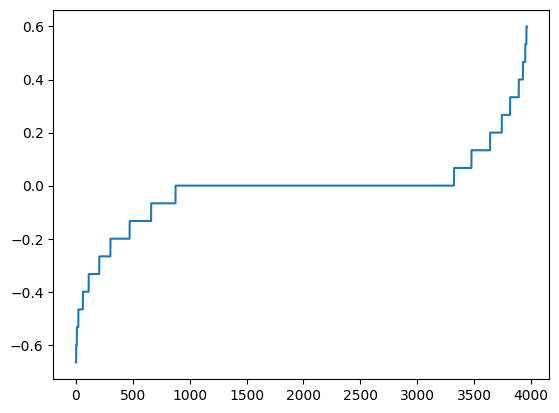

In [4591]:
plt.plot(l)
plt.show()

In [4587]:
tt = df_alg1[df_alg1["train/test"]==1]

In [4588]:
tt

,x_ind,cluster,centroid,train/test,lambda,rf,error,parent_ind
8,8,1,0,1,5,0.000000,0.000000,18
12,12,1,0,1,5,0.000000,0.000000,112
17,17,1,0,1,4,0.000000,0.000000,317
19,19,3,0,1,4,0.000000,0.066667,307
23,23,1,0,1,5,0.000000,0.000000,143
...,...,...,...,...,...,...,...,...
4932,4932,4,0,1,4,0.666667,0.000000,4752
4943,4943,0,0,1,4,0.400000,-0.066667,4843
4945,4945,0,0,1,5,0.866667,-0.200000,4835
4951,4951,2,0,1,4,0.600000,-0.466667,4641
